In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("winequality-white.csv", sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
data.duplicated().sum()

937

In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3961 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 402.3 KB


In [7]:
bins = (0, 6.5, 10)
labels = [0, 1]
data['quality'] = pd.cut(x = data['quality'], bins = bins, labels = labels)

In [10]:
data["quality"] = [int(i) for i in data["quality"]]

In [11]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,0.208281
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.406130
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,0.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,0.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3961 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 402.3 KB


In [16]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='fixed acidity'>

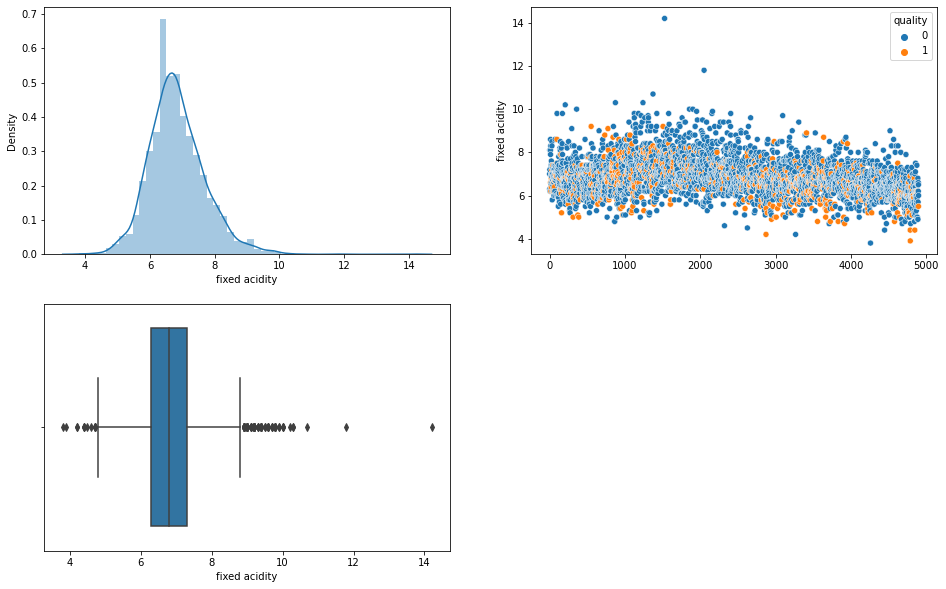

In [18]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data["fixed acidity"])
plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data.index, y=data["fixed acidity"], hue="quality")
plt.subplot(2,2,3)
sns.boxplot(data['fixed acidity'])

In [22]:
for spec in data["quality"].unique():
    selected_spec = data[data["quality"] == spec]
    selected_column = selected_spec["fixed acidity"]

    std = selected_column.std()
    avg = selected_column.mean()

    tsp = avg + 3*std
    tsm = avg - 3*std

    outliers = selected_column[((selected_spec["fixed acidity"] > tsp) | (selected_spec["fixed acidity"] < tsm))].index

    data.drop(index=outliers, inplace=True)

<AxesSubplot:xlabel='volatile acidity'>

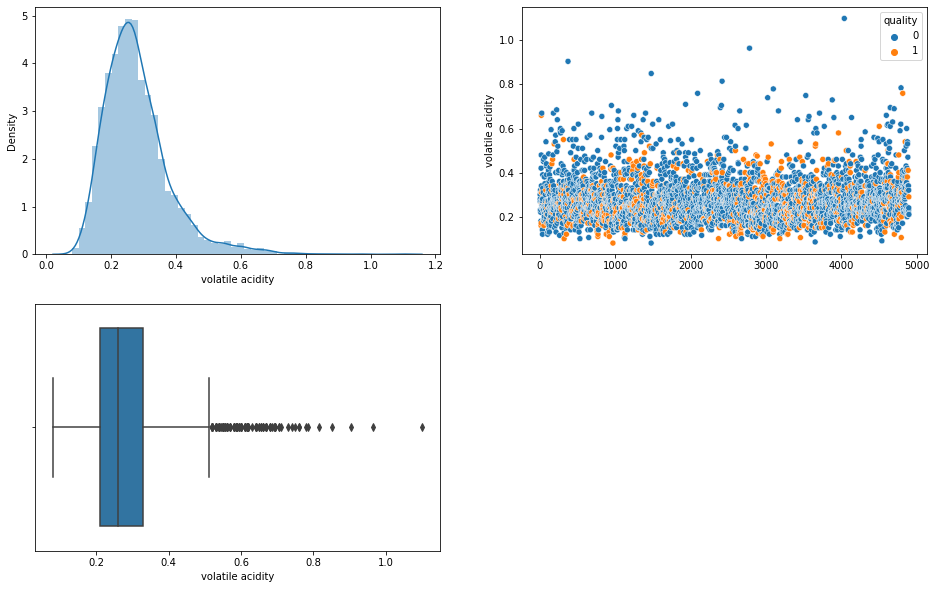

In [23]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data["volatile acidity"])
plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data.index, y=data["volatile acidity"], hue="quality")
plt.subplot(2,2,3)
sns.boxplot(data['volatile acidity'])

In [24]:
for spec in data["quality"].unique():
    selected_spec = data[data["quality"] == spec]
    selected_column = selected_spec["volatile acidity"]

    q1 = selected_column.quantile(q=0.25)
    q3 = selected_column.quantile(q=0.75)

    iqr = q3 - q1

    minimum = q1 - 1.5*iqr
    maximum = q3 + 1.5*iqr

    max_idxs = data[(data["quality"] == spec) & (data["volatile acidity"] > maximum)].index
    min_idxs = data[(data["quality"] == spec) & (data["volatile acidity"] < minimum)].index

    data.drop(index=max_idxs, inplace=True)
    data.drop(index=min_idxs, inplace=True)

<AxesSubplot:xlabel='citric acid'>

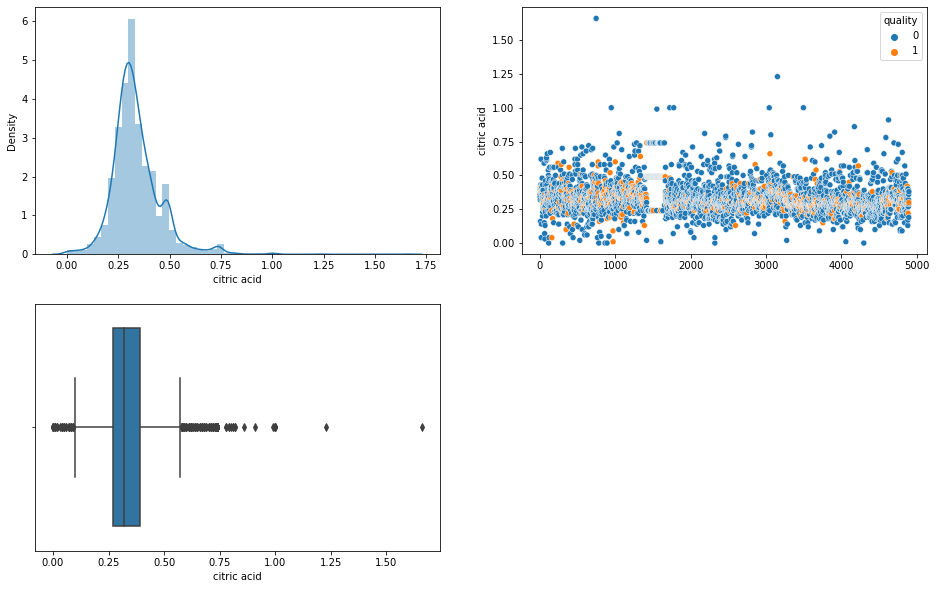

In [25]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data["citric acid"])
plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data.index, y=data["citric acid"], hue="quality")
plt.subplot(2,2,3)
sns.boxplot(data['citric acid'])

In [26]:
for spec in data["quality"].unique():
    selected_spec = data[data["quality"] == spec]
    selected_column = selected_spec["citric acid"]

    q1 = selected_column.quantile(q=0.25)
    q3 = selected_column.quantile(q=0.75)

    iqr = q3 - q1

    minimum = q1 - 1.5*iqr
    maximum = q3 + 1.5*iqr

    max_idxs = data[(data["quality"] == spec) & (data["citric acid"] > maximum)].index
    min_idxs = data[(data["quality"] == spec) & (data["citric acid"] < minimum)].index

    data.drop(index=max_idxs, inplace=True)
    data.drop(index=min_idxs, inplace=True)

<AxesSubplot:xlabel='residual sugar'>

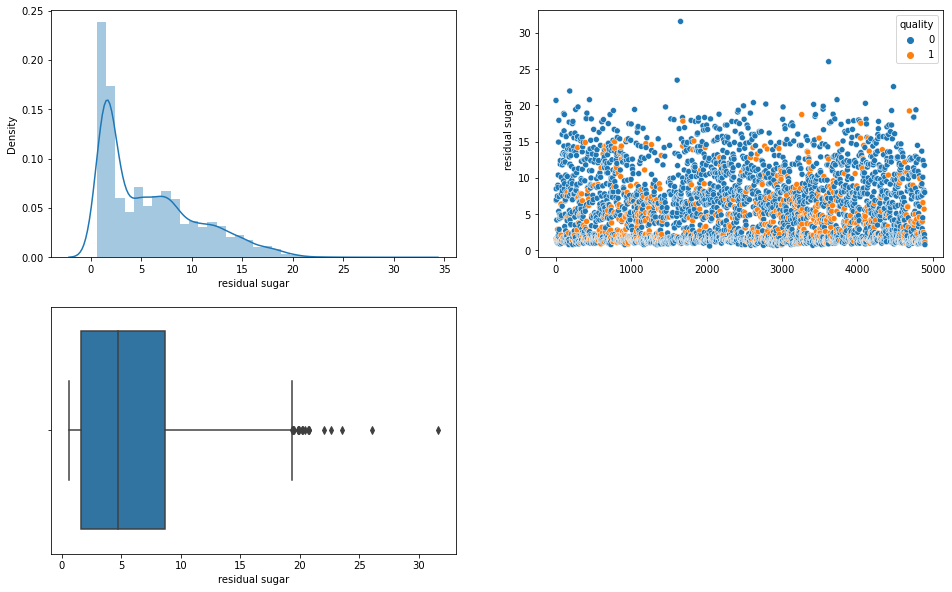

In [27]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data["residual sugar"])
plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data.index, y=data["residual sugar"], hue="quality")
plt.subplot(2,2,3)
sns.boxplot(data['residual sugar'])

In [28]:
for spec in data["quality"].unique():
    selected_spec = data[data["quality"] == spec]
    selected_column = selected_spec["residual sugar"]

    q1 = selected_column.quantile(q=0.25)
    q3 = selected_column.quantile(q=0.75)

    iqr = q3 - q1

    minimum = q1 - 1.5*iqr
    maximum = q3 + 1.5*iqr

    max_idxs = data[(data["quality"] == spec) & (data["residual sugar"] > maximum)].index
    min_idxs = data[(data["quality"] == spec) & (data["residual sugar"] < minimum)].index

    data.drop(index=max_idxs, inplace=True)
    data.drop(index=min_idxs, inplace=True)

<AxesSubplot:xlabel='chlorides'>

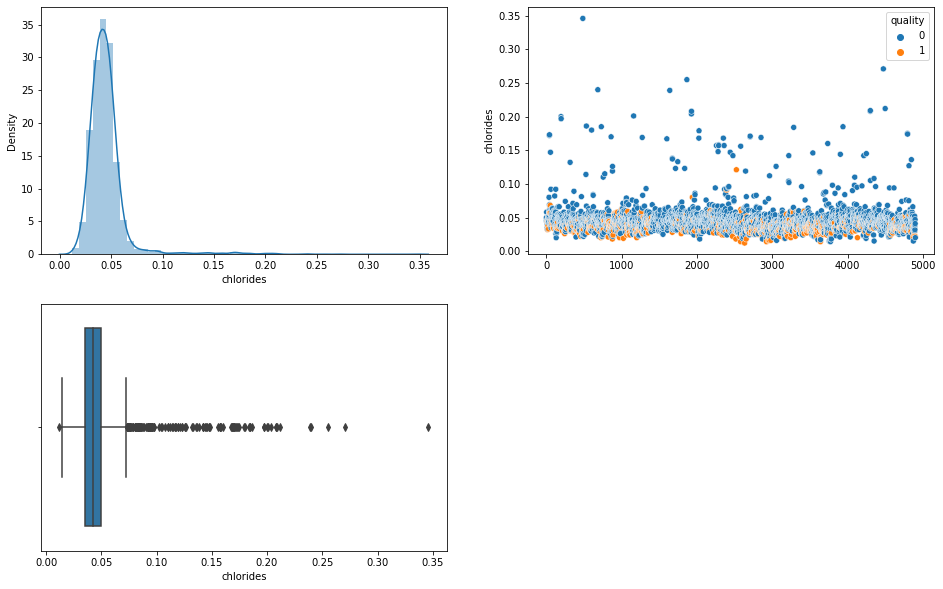

In [29]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data["chlorides"])
plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data.index, y=data["chlorides"], hue="quality")
plt.subplot(2,2,3)
sns.boxplot(data['chlorides'])

In [30]:
for spec in data["quality"].unique():
    selected_spec = data[data["quality"] == spec]
    selected_column = selected_spec["chlorides"]

    std = selected_column.std()
    avg = selected_column.mean()

    tsp = avg + 3*std
    tsm = avg - 3*std

    outliers = selected_column[((selected_spec["chlorides"] > tsp) | (selected_spec["chlorides"] < tsm))].index

    data.drop(index=outliers, inplace=True)

<AxesSubplot:xlabel='free sulfur dioxide'>

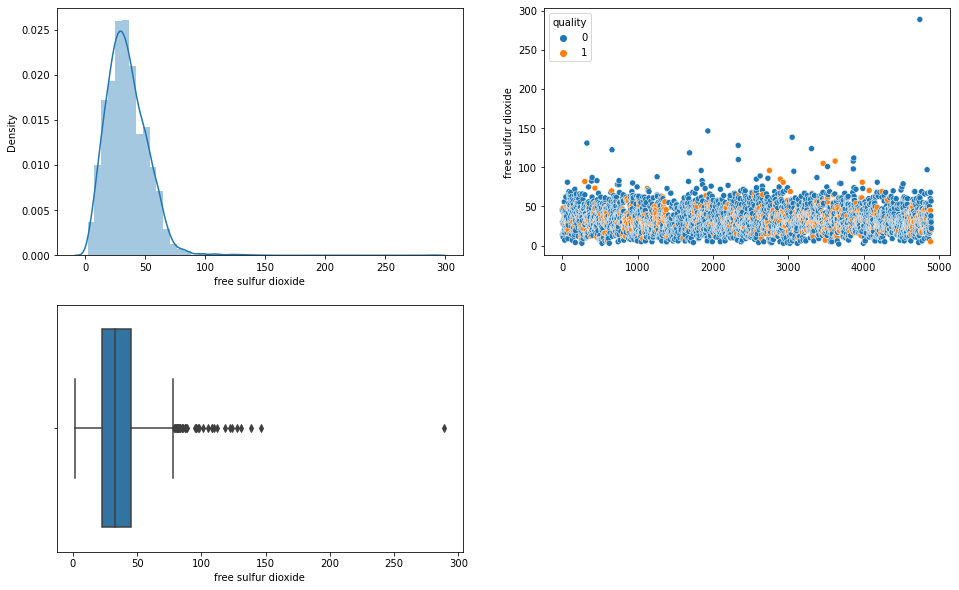

In [31]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data["free sulfur dioxide"])
plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data.index, y=data["free sulfur dioxide"], hue="quality")
plt.subplot(2,2,3)
sns.boxplot(data['free sulfur dioxide'])

In [32]:
for spec in data["quality"].unique():
    selected_spec = data[data["quality"] == spec]
    selected_column = selected_spec["free sulfur dioxide"]

    std = selected_column.std()
    avg = selected_column.mean()

    tsp = avg + 3*std
    tsm = avg - 3*std

    outliers = selected_column[((selected_spec["free sulfur dioxide"] > tsp) | (selected_spec["free sulfur dioxide"] < tsm))].index

    data.drop(index=outliers, inplace=True)

<AxesSubplot:xlabel='total sulfur dioxide'>

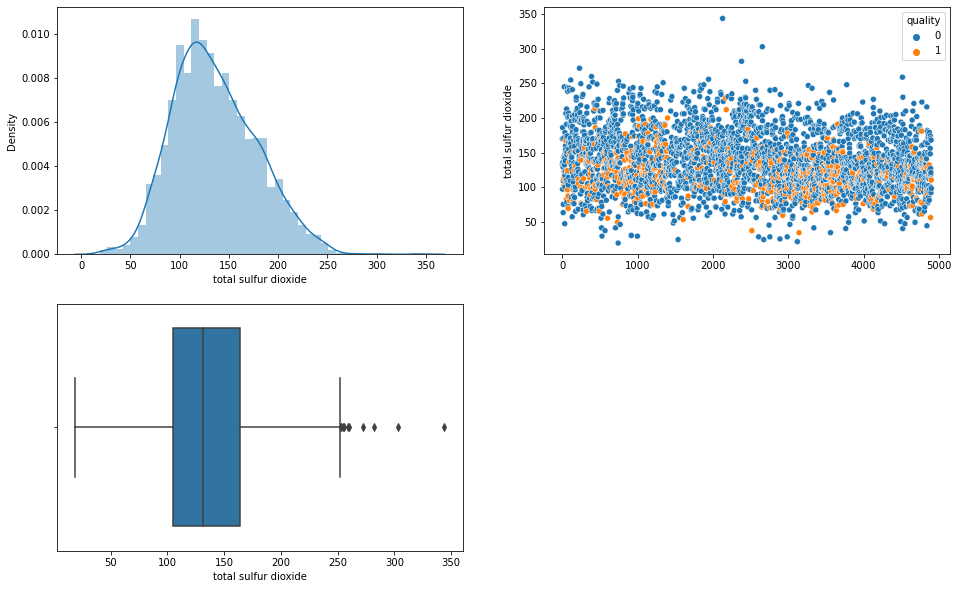

In [33]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data["total sulfur dioxide"])
plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data.index, y=data["total sulfur dioxide"], hue="quality")
plt.subplot(2,2,3)
sns.boxplot(data['total sulfur dioxide'])

In [34]:
for spec in data["quality"].unique():
    selected_spec = data[data["quality"] == spec]
    selected_column = selected_spec["total sulfur dioxide"]

    q1 = selected_column.quantile(q=0.25)
    q3 = selected_column.quantile(q=0.75)

    iqr = q3 - q1

    minimum = q1 - 1.5*iqr
    maximum = q3 + 1.5*iqr

    max_idxs = data[(data["quality"] == spec) & (data["total sulfur dioxide"] > maximum)].index
    min_idxs = data[(data["quality"] == spec) & (data["total sulfur dioxide"] < minimum)].index

    data.drop(index=max_idxs, inplace=True)
    data.drop(index=min_idxs, inplace=True)

<AxesSubplot:xlabel='density'>

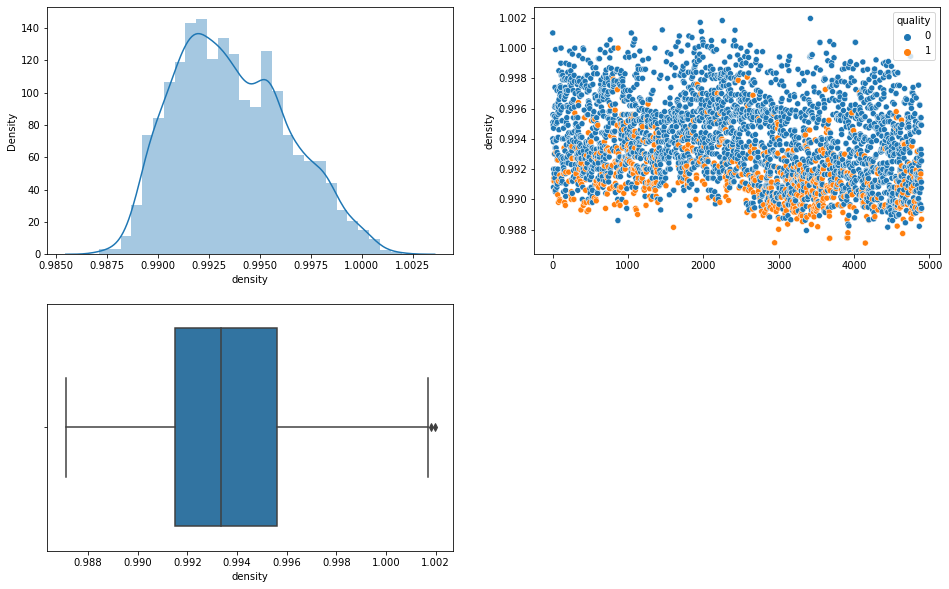

In [36]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data["density"])
plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data.index, y=data["density"], hue="quality")
plt.subplot(2,2,3)
sns.boxplot(data['density'])

In [37]:
for spec in data["quality"].unique():
    selected_spec = data[data["quality"] == spec]
    selected_column = selected_spec["density"]

    q1 = selected_column.quantile(q=0.25)
    q3 = selected_column.quantile(q=0.75)

    iqr = q3 - q1

    minimum = q1 - 1.5*iqr
    maximum = q3 + 1.5*iqr

    max_idxs = data[(data["quality"] == spec) & (data["density"] > maximum)].index
    min_idxs = data[(data["quality"] == spec) & (data["density"] < minimum)].index

    data.drop(index=max_idxs, inplace=True)
    data.drop(index=min_idxs, inplace=True)

<AxesSubplot:xlabel='pH'>

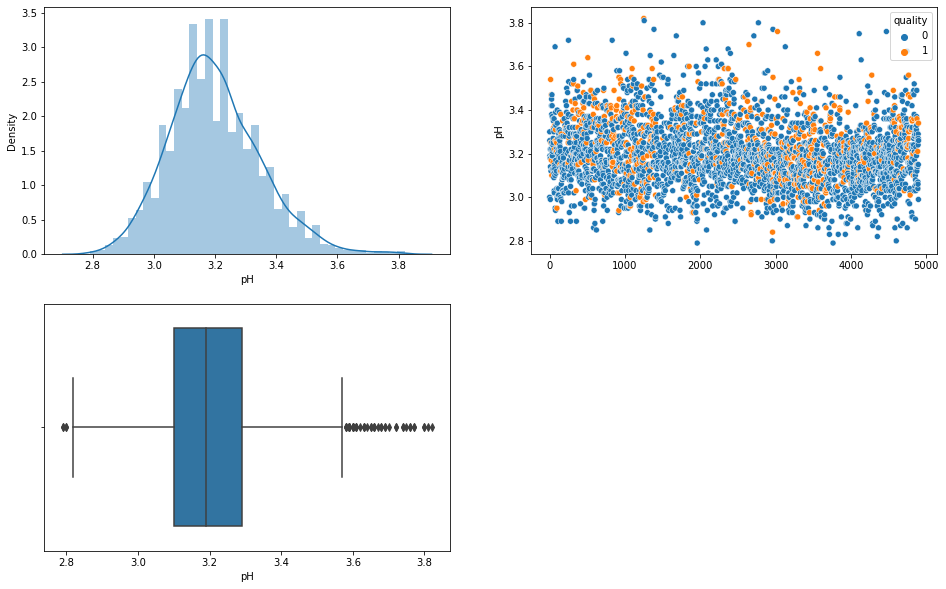

In [38]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data["pH"])
plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data.index, y=data["pH"], hue="quality")
plt.subplot(2,2,3)
sns.boxplot(data['pH'])

In [39]:
for spec in data["quality"].unique():
    selected_spec = data[data["quality"] == spec]
    selected_column = selected_spec["pH"]

    std = selected_column.std()
    avg = selected_column.mean()

    tsp = avg + 3*std
    tsm = avg - 3*std

    outliers = selected_column[((selected_spec["pH"] > tsp) | (selected_spec["pH"] < tsm))].index

    data.drop(index=outliers, inplace=True)

<AxesSubplot:xlabel='sulphates'>

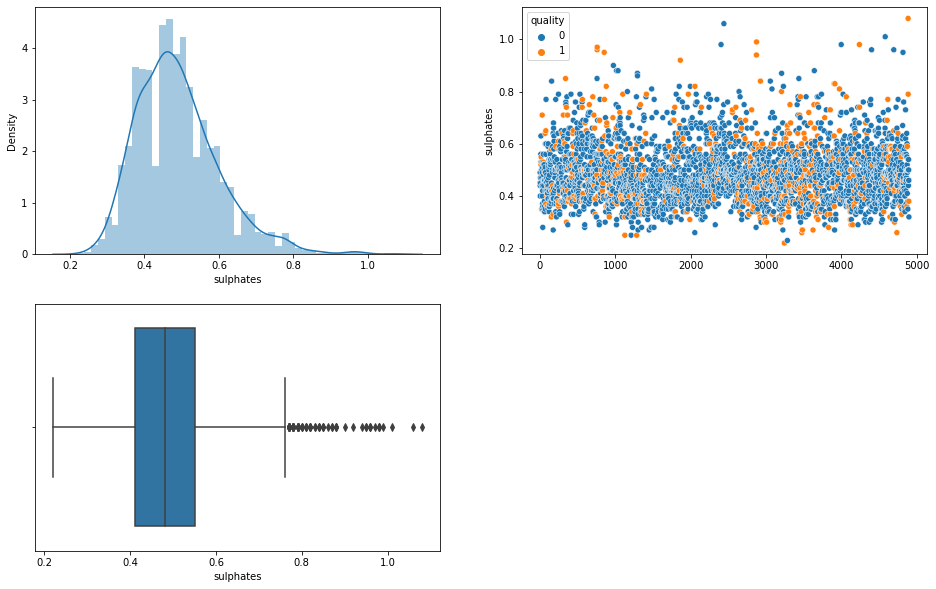

In [40]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data["sulphates"])
plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data.index, y=data["sulphates"], hue="quality")
plt.subplot(2,2,3)
sns.boxplot(data['sulphates'])

In [41]:
for spec in data["quality"].unique():
    selected_spec = data[data["quality"] == spec]
    selected_column = selected_spec["sulphates"]

    q1 = selected_column.quantile(q=0.25)
    q3 = selected_column.quantile(q=0.75)

    iqr = q3 - q1

    minimum = q1 - 1.5*iqr
    maximum = q3 + 1.5*iqr

    max_idxs = data[(data["quality"] == spec) & (data["sulphates"] > maximum)].index
    min_idxs = data[(data["quality"] == spec) & (data["sulphates"] < minimum)].index

    data.drop(index=max_idxs, inplace=True)
    data.drop(index=min_idxs, inplace=True)

<AxesSubplot:xlabel='alcohol'>

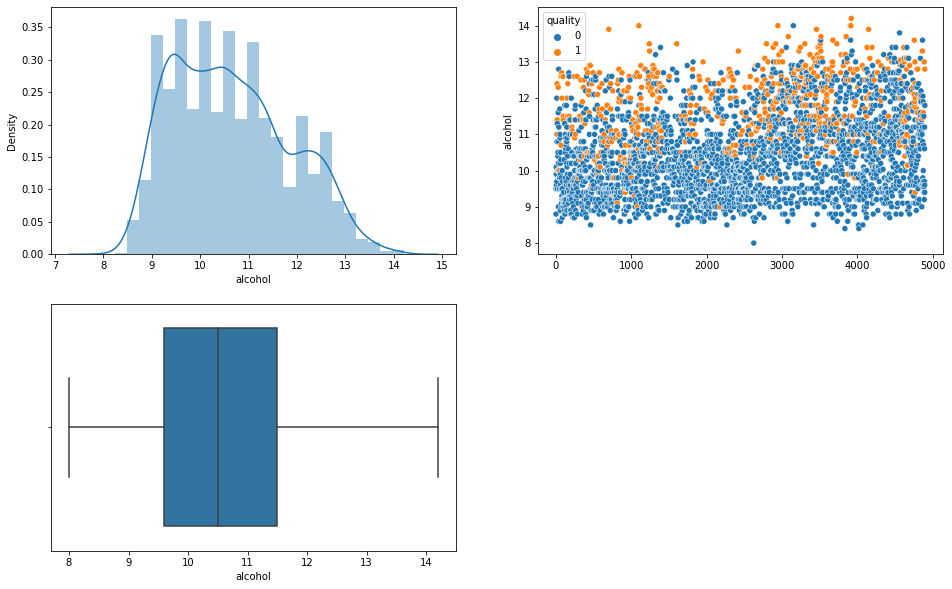

In [42]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data["alcohol"])
plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data.index, y=data["alcohol"], hue="quality")
plt.subplot(2,2,3)
sns.boxplot(data['alcohol'])

In [43]:
for spec in data["quality"].unique():
    selected_spec = data[data["quality"] == spec]
    selected_column = selected_spec["alcohol"]

    q1 = selected_column.quantile(q=0.25)
    q3 = selected_column.quantile(q=0.75)

    iqr = q3 - q1

    minimum = q1 - 1.5*iqr
    maximum = q3 + 1.5*iqr

    max_idxs = data[(data["quality"] == spec) & (data["alcohol"] > maximum)].index
    min_idxs = data[(data["quality"] == spec) & (data["alcohol"] < minimum)].index

    data.drop(index=max_idxs, inplace=True)
    data.drop(index=min_idxs, inplace=True)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3316 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3316 non-null   float64
 1   volatile acidity      3316 non-null   float64
 2   citric acid           3316 non-null   float64
 3   residual sugar        3316 non-null   float64
 4   chlorides             3316 non-null   float64
 5   free sulfur dioxide   3316 non-null   float64
 6   total sulfur dioxide  3316 non-null   float64
 7   density               3316 non-null   float64
 8   pH                    3316 non-null   float64
 9   sulphates             3316 non-null   float64
 10  alcohol               3316 non-null   float64
 11  quality               3316 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 465.8 KB


<AxesSubplot:>

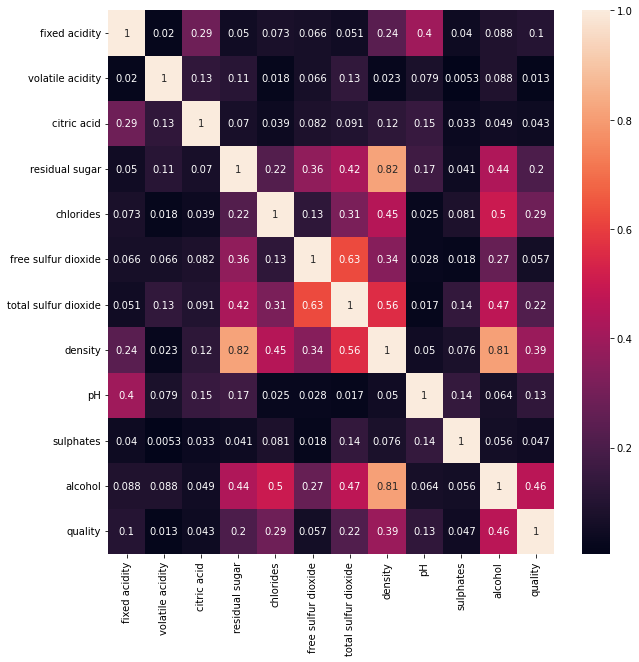

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr().abs(), annot=True)

In [46]:
data.corr()["quality"].abs().sort_values(ascending=False)

quality                 1.000000
alcohol                 0.461818
density                 0.387099
chlorides               0.286001
total sulfur dioxide    0.218695
residual sugar          0.203734
pH                      0.131953
fixed acidity           0.103187
free sulfur dioxide     0.056849
sulphates               0.047382
citric acid             0.042826
volatile acidity        0.013471
Name: quality, dtype: float64

In [47]:
data["quality"].value_counts()

0    2659
1     657
Name: quality, dtype: int64

In [48]:
X = data.drop("quality", axis=1)
y = data["quality"]

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X, y, test_size=0.25, random_state=10)

In [51]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [52]:
Xtrain_o, ytrain_o = sm.fit_resample(Xtrain, ytrain)

In [53]:
Xtrain1,Xtest1,ytrain1,ytest1 = train_test_split(Xtrain_o, ytrain_o, test_size=0.25, random_state=10)

In [55]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators = 250, random_state=0)
rfc.fit(Xtrain1, ytrain1)

ypred = rfc.predict(Xtest1)

In [57]:
ypred1 = rfc.predict(Xtest)

In [56]:
from sklearn.metrics import confusion_matrix, classification_report

In [58]:
confusion_matrix(ytest1, ypred)

array([[423,  68],
       [ 27, 480]], dtype=int64)

In [60]:
print(classification_report(ytest1, ypred))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       491
           1       0.88      0.95      0.91       507

    accuracy                           0.90       998
   macro avg       0.91      0.90      0.90       998
weighted avg       0.91      0.90      0.90       998



In [61]:
confusion_matrix(ytest, ypred1)

array([[574,  89],
       [ 54, 112]], dtype=int64)

In [62]:
print(classification_report(ytest, ypred1))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       663
           1       0.56      0.67      0.61       166

    accuracy                           0.83       829
   macro avg       0.74      0.77      0.75       829
weighted avg       0.84      0.83      0.83       829



In [63]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(Xtrain1, ytrain1)

ypred2 = xgb.predict(Xtest1)

In [64]:
ypred22 = xgb.predict(Xtest)

In [65]:
confusion_matrix(ytest1, ypred2)

array([[439,  52],
       [ 34, 473]], dtype=int64)

In [66]:
print(classification_report(ytest1, ypred2))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       491
           1       0.90      0.93      0.92       507

    accuracy                           0.91       998
   macro avg       0.91      0.91      0.91       998
weighted avg       0.91      0.91      0.91       998



In [67]:
confusion_matrix(ytest, ypred22)

array([[590,  73],
       [ 60, 106]], dtype=int64)

In [68]:
print(classification_report(ytest, ypred22))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       663
           1       0.59      0.64      0.61       166

    accuracy                           0.84       829
   macro avg       0.75      0.76      0.76       829
weighted avg       0.84      0.84      0.84       829

